In [ ]:
#sklearn 1.1.0버전으로 재설치
#!pip uninstall sklearn
#!pip install --upgrade sklearn
#!pip install scikit-learn==1.1.0 --user

#버전 확인(커널 닫았다가 열기)
#import sklearn
#sklearn.__version__

#오버샘플링
#!pip install imblearn

#xgboost
#!pip install xgboost

In [ ]:
# 코랩용 나눔폰트 설치, 해당 셀 실행 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 데이터 불러오기, 개요 확인

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

%matplotlib inline

In [6]:
#코랩용
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#코랩용
#food = pd.read_csv("/content/drive/MyDrive/bigdata/경양식 생존.csv", encoding='cp949')

In [ ]:
#주피터용
food = pd.read_csv('경양식 생존.csv', encoding='cp949') #csv 불러오기

In [228]:
food.head() #csv 5행만 보기

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,27,1,0,167,89,0,0,0.562804,0,126,...,449,1027,578,3906,0,10936.29824,8,11670.19361,1000,0.973710
1,30,1,0,97,67,0,0,0.495135,0,33,...,467,925,458,934,0,23521.13493,7,25483.16608,895,0.967568
2,185,1,0,117,95,0,0,0.511019,0,26,...,1176,2405,1229,822,0,18597.21201,15,20944.66626,2220,0.923077
3,52,1,0,160,63,0,0,0.416667,0,50,...,392,672,280,1519,0,29842.30973,6,28329.05959,620,0.922619
4,763,1,0,34,62,0,0,0.434224,0,35,...,1101,1946,845,1409,0,14473.70103,22,13273.29821,1183,0.607914


In [17]:
food.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업장명           3840 non-null   object 
 1   소재지면적          3840 non-null   int64  
 2   교통 수           3840 non-null   int64  
 3   집객시설 수         3840 non-null   int64  
 4   교육 수           3840 non-null   int64  
 5   경쟁자 수          3840 non-null   int64  
 6   인허가 영업         3840 non-null   int64  
 7   인허가 폐업         3840 non-null   int64  
 8   인허가 영업+폐업      3840 non-null   int64  
 9   타업종비율          3840 non-null   float64
 10  타업종경쟁자         3840 non-null   int64  
 11  버퍼내폐업비율        3840 non-null   float64
 12  영업기간           3840 non-null   int64  
 13  생존여부           3840 non-null   int64  
 14  아파트 세대수        3840 non-null   int64  
 15  제곱미터 당 임대료     3840 non-null   float64
 16  임대료            3840 non-null   int64  
 17  총생활인구수         3840 non-null   float64
 18  점심저녁시간대 

## 결측치 확인 및 전처리

In [18]:
#문자형 변수 확인
object_columns = food.columns[food.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 확인
food[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,개편한카페
1,까페일상
2,김류정 카페
3,저스트그릴브로
4,랍스터 바(Lobster Bar)
...,...
3835,앵거스박고기공장 길동점
3836,꼬망세피자 암사점
3837,그래버 커피
3838,너랑나랑


In [19]:
#필요없는 문자형 변수 제외
feature1columns =list(food.columns.difference(food[object_columns].columns)) 
food=food[feature1columns]

In [20]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,제곱미터 당 임대료,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,27,1,0,167,89,0,0,0.562804,0,126,...,1027,578,3906,0,10936.29824,30987.55550,8,11670.19361,1000,0.973710
1,30,1,0,97,67,0,0,0.495135,0,33,...,925,458,934,0,23521.13493,28309.61375,7,25483.16608,895,0.967568
2,185,1,0,117,95,0,0,0.511019,0,26,...,2405,1229,822,0,18597.21201,31104.70000,15,20944.66626,2220,0.923077
3,52,1,0,160,63,0,0,0.416667,0,50,...,672,280,1519,0,29842.30973,30374.63000,6,28329.05959,620,0.922619
4,763,1,0,34,62,0,0,0.434224,0,35,...,1946,845,1409,0,14473.70103,40597.92000,22,13273.29821,1183,0.607914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,57,0,0,182,78,1,0,0.527746,0,23,...,1730,913,691,0,26266.09208,29924.51000,8,27061.59271,1673,0.967052
3836,43,0,0,346,76,1,0,0.526231,0,30,...,1239,652,1063,0,24113.64599,35804.80750,11,27322.39298,1196,0.965295
3837,65,0,0,161,68,1,0,0.539855,1,16,...,1932,1043,494,0,44202.78123,30875.16667,13,44286.53272,1867,0.966356
3838,66,0,0,149,65,1,0,0.538906,0,26,...,1902,1025,800,0,44202.78123,30875.16667,13,44286.53272,1836,0.965300


In [21]:
#추가로 필요없는 변수 제외
feature2columns =list(food.columns.difference(food[["영업기간", "제곱미터 당 임대료"]].columns)) 
food=food[feature2columns]

In [22]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,27,1,0,167,89,0,0,0.562804,0,126,...,449,1027,578,3906,0,10936.29824,8,11670.19361,1000,0.973710
1,30,1,0,97,67,0,0,0.495135,0,33,...,467,925,458,934,0,23521.13493,7,25483.16608,895,0.967568
2,185,1,0,117,95,0,0,0.511019,0,26,...,1176,2405,1229,822,0,18597.21201,15,20944.66626,2220,0.923077
3,52,1,0,160,63,0,0,0.416667,0,50,...,392,672,280,1519,0,29842.30973,6,28329.05959,620,0.922619
4,763,1,0,34,62,0,0,0.434224,0,35,...,1101,1946,845,1409,0,14473.70103,22,13273.29821,1183,0.607914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,57,0,0,182,78,1,0,0.527746,0,23,...,817,1730,913,691,0,26266.09208,8,27061.59271,1673,0.967052
3836,43,0,0,346,76,1,0,0.526231,0,30,...,587,1239,652,1063,0,24113.64599,11,27322.39298,1196,0.965295
3837,65,0,0,161,68,1,0,0.539855,1,16,...,889,1932,1043,494,0,44202.78123,13,44286.53272,1867,0.966356
3838,66,0,0,149,65,1,0,0.538906,0,26,...,877,1902,1025,800,0,44202.78123,13,44286.53272,1836,0.965300


In [23]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 먼저 결측치가 얼마나 있는지 확인합니다. 
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없음.

food.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
생존여부             0
소재지면적            0
아파트 세대수          0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

## EDA

In [24]:
#범주형 데이터의 통계적 개요 
food.describe(include="all") 

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,...,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,396.169792,0.268490,0.005469,239.271354,80.842187,0.390365,0.308073,0.483554,0.163802,105.119792,...,1049.346615,2068.677083,1019.330469,4321.030990,0.027604,40000.094758,46.872917,35827.040742,1672.507292,0.829524
std,380.151194,0.443231,0.073758,218.194393,28.374805,0.487896,0.461757,0.060254,0.370144,148.250101,...,562.851634,1158.099084,620.336715,6403.220743,0.163857,27673.392380,69.491788,21239.089524,895.786715,0.119657
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.272414,0.000000,4.000000,...,2.000000,3.000000,1.000000,132.000000,0.000000,3443.532098,0.000000,2960.416900,2.000000,0.503891
25%,98.750000,0.000000,0.000000,107.000000,59.000000,0.000000,0.000000,0.450105,0.000000,33.000000,...,606.000000,1174.000000,554.000000,1249.000000,0.000000,21111.776820,9.000000,20944.666260,971.750000,0.785474
50%,204.000000,0.000000,0.000000,184.000000,76.000000,0.000000,0.000000,0.498650,0.000000,63.000000,...,922.000000,1742.000000,819.000000,2433.500000,0.000000,32537.416860,15.000000,31344.247430,1521.500000,0.860678
75%,663.000000,1.000000,0.000000,311.250000,99.000000,1.000000,1.000000,0.521359,0.000000,124.000000,...,1469.250000,2970.000000,1452.250000,5051.750000,0.000000,50716.613580,41.000000,43935.742510,2227.250000,0.920896
max,1732.000000,1.000000,1.000000,1657.000000,169.000000,1.000000,1.000000,0.679612,1.000000,2687.000000,...,2634.000000,5199.000000,2796.000000,117744.000000,1.000000,134994.908800,321.000000,108753.472800,4195.000000,0.988473


In [25]:
#한글 폰트 지정 - 주피터용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Maigun Gothic'

In [229]:
#한글 폰트 지정 - 코랩용
plt.rcParams['font.family'] = 'NanumGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44264 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_te

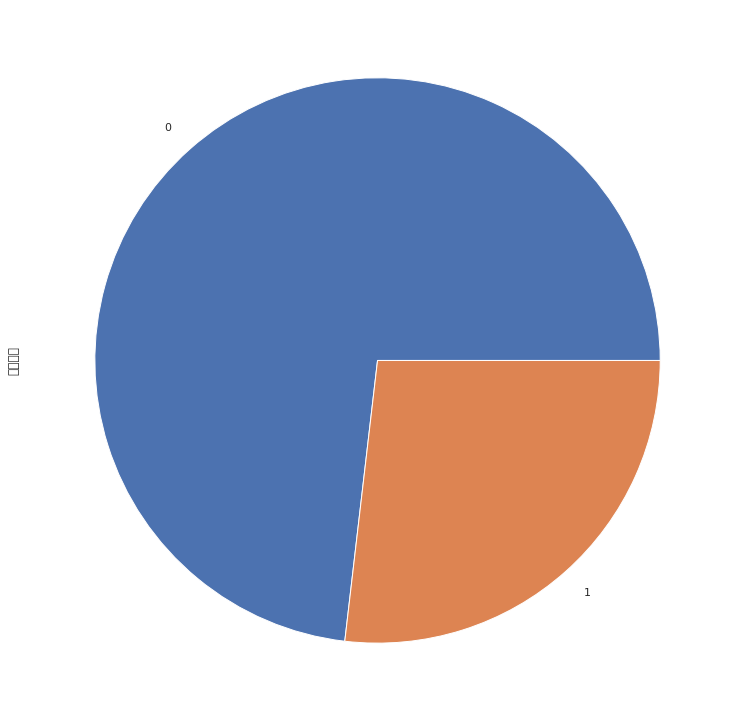

In [230]:
#범주형 데이터 확인
food['골목상권'].value_counts().plot(kind="pie")

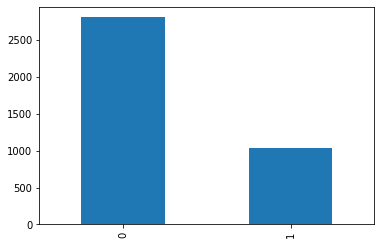

In [28]:
#범주형 데이터 확인
food['골목상권'].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0, flags=flags)


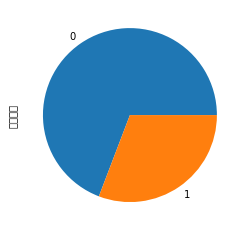

In [29]:
#범주형 데이터 확인
food['발달상권'].value_counts().plot(kind="pie")

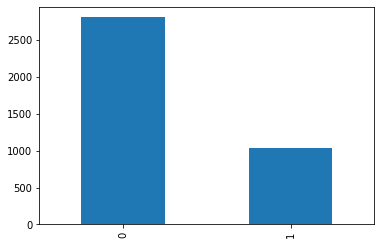

In [31]:
#범주형 데이터 확인
food['골목상권'].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_te

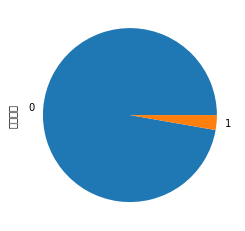

In [32]:
#범주형 데이터 확인
food['전통시장'].value_counts().plot(kind="pie")

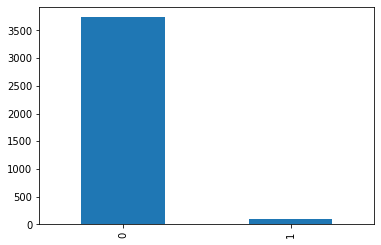

In [33]:
#범주형 데이터 확인
food['전통시장'].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_te

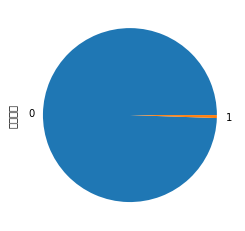

In [34]:
#범주형 데이터 확인
food['관광특구'].value_counts().plot(kind="pie")

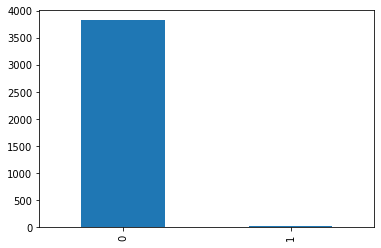

In [35]:
#범주형 데이터 확인
food['관광특구'].value_counts().plot(kind="bar")

In [36]:
#범주형 target 데이터 확인
food['생존여부'].value_counts()

0    3211
1     629
Name: 생존여부, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_te

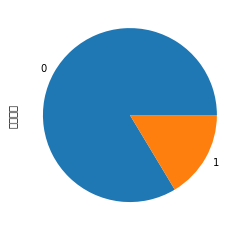

In [37]:
#원그래프로 범주형 target 데이터 확인
food['생존여부'].value_counts().plot(kind="pie")  

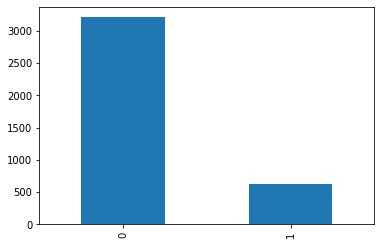

In [38]:
#원그래프로 범주형 target 데이터 확인, 폐업이 더 많이 차지, 데이터 불균형
food['생존여부'].value_counts().plot(kind="bar")

In [39]:
#열이름 확인
food.columns

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [40]:
#연속형 변수 기초통계량 확인
food[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,80.842187,46.872917,239.271354,396.169792,1049.346615,1019.330469,2068.677083
std,28.374805,69.491788,218.194393,380.151194,562.851634,620.336715,1158.099084
min,7.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000
25%,59.000000,9.000000,107.000000,98.750000,606.000000,554.000000,1174.000000
50%,76.000000,15.000000,184.000000,204.000000,922.000000,819.000000,1742.000000
75%,99.000000,41.000000,311.250000,663.000000,1469.250000,1452.250000,2970.000000
max,169.000000,321.000000,1657.000000,1732.000000,2634.000000,2796.000000,5199.000000


In [41]:
#연속형 변수 기초통계량 확인
food[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()
#타업종비율, 타업종경쟁자 버퍼내폐업비율 제외 모두 이상치 많이 있을 것으로 예상(mean, min, max 분산 확인결과)

,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000,3840.000000
mean,0.829524,1672.507292,0.483554,8510.696615,4321.030990,35827.040742,40000.094758
std,0.119657,895.786715,0.060254,6343.617256,6403.220743,21239.089524,27673.392380
min,0.503891,2.000000,0.272414,0.000000,132.000000,2960.416900,3443.532098
25%,0.785474,971.750000,0.450105,3705.000000,1249.000000,20944.666260,21111.776820
50%,0.860678,1521.500000,0.498650,7257.000000,2433.500000,31344.247430,32537.416860
75%,0.920896,2227.250000,0.521359,11599.500000,5051.750000,43935.742510,50716.613580
max,0.988473,4195.000000,0.679612,36442.000000,117744.000000,108753.472800,134994.908800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

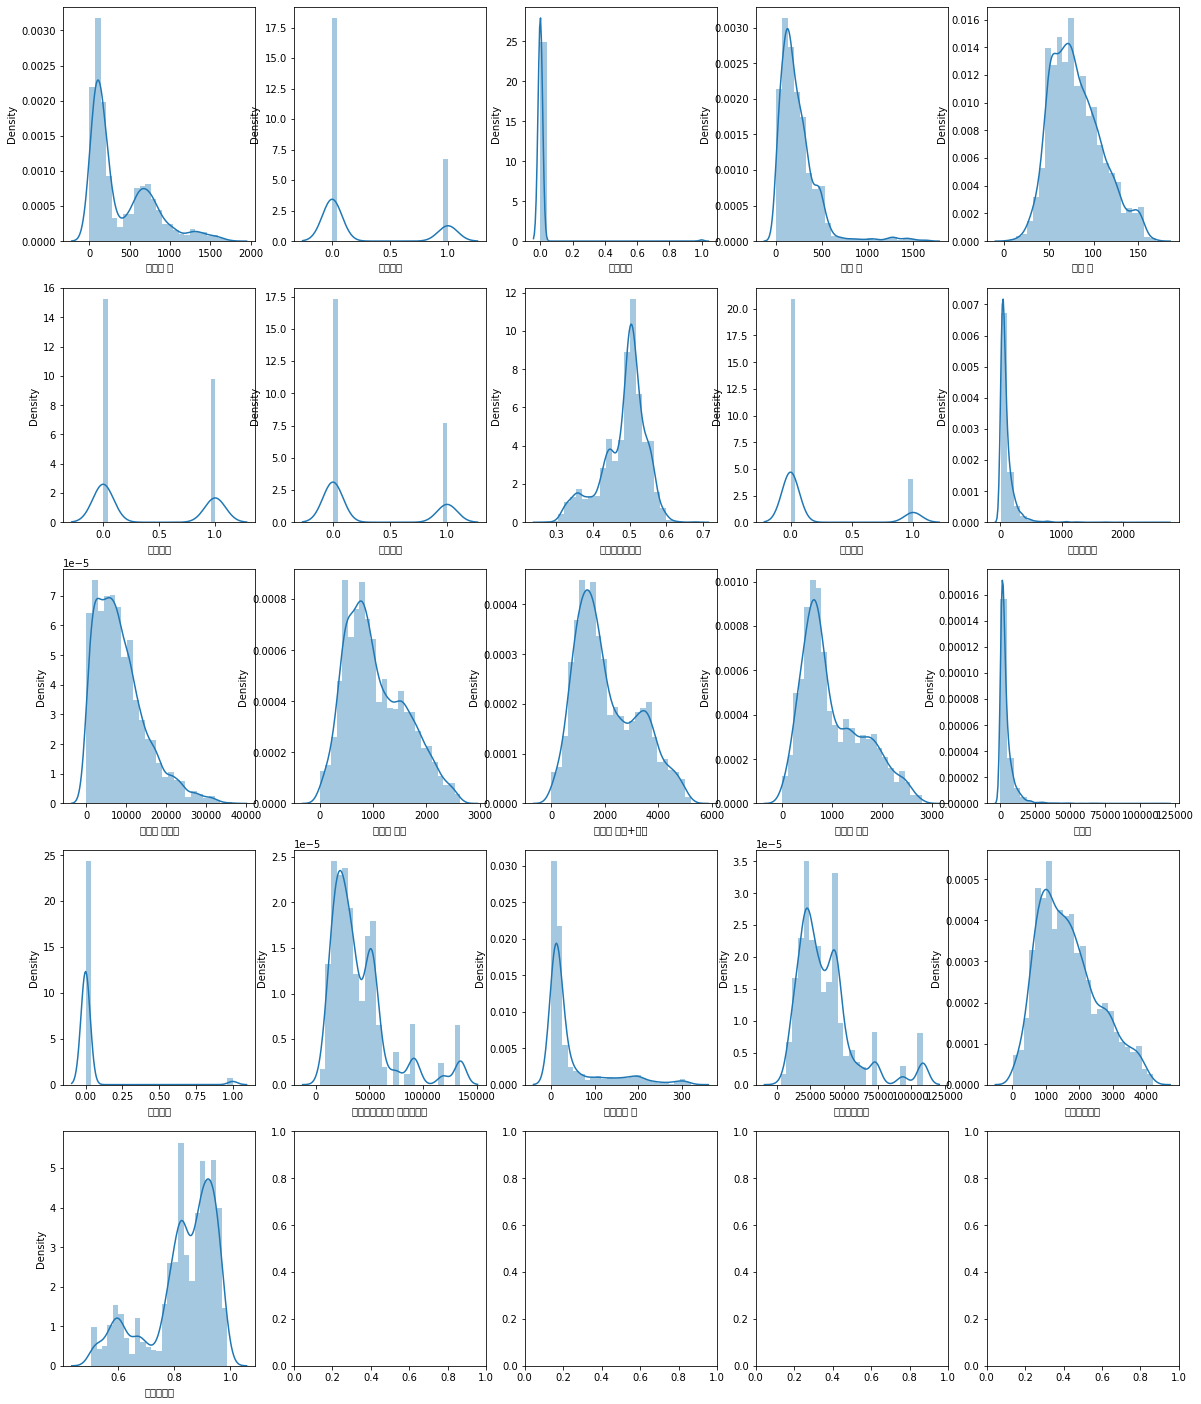

In [42]:
#전체 히스토그램그려보기
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(food.columns):
    sns.distplot(food[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

In [43]:
#왜도 첨도 확인
for col in food:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(food[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(food[col].kurt())  
         ) 
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 변수(왜도가 -1~1 밖의 값) : 경쟁자수, 교육수, 소재지면적, 아파트 세대수, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 총생활인구수, 타업종비율

경쟁자 수           Skewness: 01.13     Kurtosis: 000.52
골목상권            Skewness: 01.05     Kurtosis: -00.91
관광특구            Skewness: 13.42     Kurtosis: 178.10
교육 수            Skewness: 02.82     Kurtosis: 011.58
교통 수            Skewness: 00.55     Kurtosis: -00.16
구분불가            Skewness: 00.45     Kurtosis: -01.80
발달상권            Skewness: 00.83     Kurtosis: -01.31
버퍼내폐업비율         Skewness: -0.84     Kurtosis: 000.40
생존여부            Skewness: 01.82     Kurtosis: 001.30
소재지면적           Skewness: 06.89     Kurtosis: 079.74
아파트 세대수         Skewness: 01.12     Kurtosis: 001.23
인허가 영업          Skewness: 00.56     Kurtosis: -00.48
인허가 영업+폐업       Skewness: 00.61     Kurtosis: -00.57
인허가 폐업          Skewness: 00.75     Kurtosis: -00.37
임대료             Skewness: 06.81     Kurtosis: 077.44
전통시장            Skewness: 05.77     Kurtosis: 031.30
점심저녁시간대 생활인구수   Skewness: 01.79     Kurtosis: 003.35
집객시설 수          Skewness: 02.11     Kurtosis: 003.61
총생활인구수          Skewness: 01.66     Kurtosis: 

## 정규화(로그변환 및 로버스트 스케일링)

In [44]:
#스케일링 방법 결정
#출처 - https://soo-jjeong.tistory.com/122
Afood1=food.copy()
Arob = Afood1[Afood1.columns.difference(['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종비율', '골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
Adis =Afood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
Alog =Afood1[['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종비율']] #log변환 데이터

In [45]:
#log변환할 데이터
Alog.head()

,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,27,167,126,11259,3906,10936.29824,8,11670.19361,0.973710
1,30,97,33,3479,934,23521.13493,7,25483.16608,0.967568
2,185,117,26,2112,822,18597.21201,15,20944.66626,0.923077
3,52,160,50,9468,1519,29842.30973,6,28329.05959,0.922619
4,763,34,35,1609,1409,14473.70103,22,13273.29821,0.607914


In [46]:
#범주형 변수 데이터
Adis.head()

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [47]:
#로버스트 스케일링할 데이터
Arob.head()

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자
0,89,0.562804,449,1027,578,1000
1,67,0.495135,467,925,458,895
2,95,0.511019,1176,2405,1229,2220
3,63,0.416667,392,672,280,620
4,62,0.434224,1101,1946,845,1183


In [48]:
#로그변환할 열 이름
Alog.columns 

Index(['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '임대료', '점심저녁시간대 생활인구수', '집객시설 수',
       '총생활인구수', '타업종비율'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51137 missing from cur

Skewness: -0.306
Kurtosis: -0.550


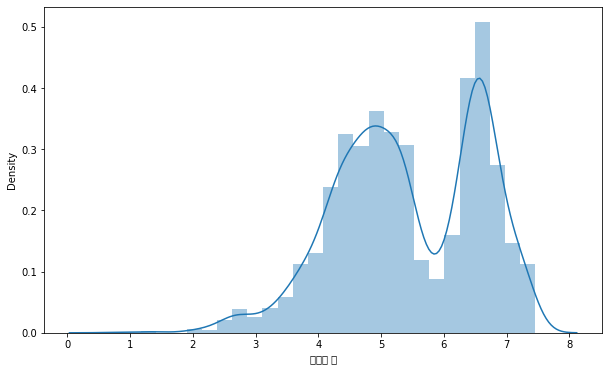

In [49]:
#경쟁자 수 열 로그 변환 후 히스토그램
Alog["경쟁자 수"] = np.log1p(Alog["경쟁자 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["경쟁자 수"])

print("Skewness: {:.3f}".format(Alog["경쟁자 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["경쟁자 수"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50977 missing from cur

Skewness: -0.551
Kurtosis: 0.543


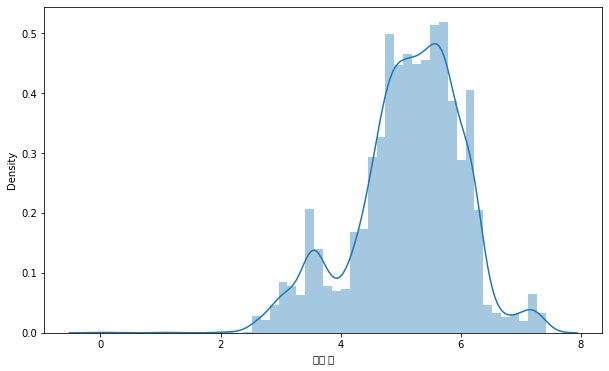

In [50]:
#교육 수 열 로그 변환 후 히스토그램
Alog["교육 수"] = np.log1p(Alog["교육 수"])
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["교육 수"])

print("Skewness: {:.3f}".format(Alog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["교육 수"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51116 missing from cur

Skewness: 0.322
Kurtosis: 0.018


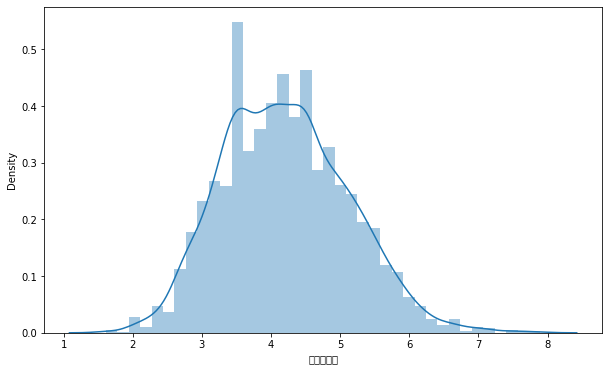

In [51]:
#소재지면적 열 로그 변환 후 히스토그램
Alog["소재지면적"] = np.log1p(Alog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["소재지면적"])

print("Skewness: {:.3f}".format(Alog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(Alog["소재지면적"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from cur

Skewness: -2.672
Kurtosis: 15.738


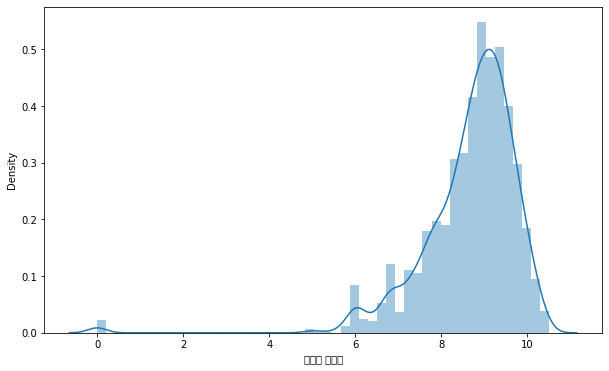

In [52]:
#아파트 세대수 열 로그 변환 후 히스토그램
Alog["아파트 세대수"] = np.log1p(Alog["아파트 세대수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["아파트 세대수"])

print("Skewness: {:.3f}".format(Alog["아파트 세대수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["아파트 세대수"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from cur

Skewness: 0.284
Kurtosis: -0.108


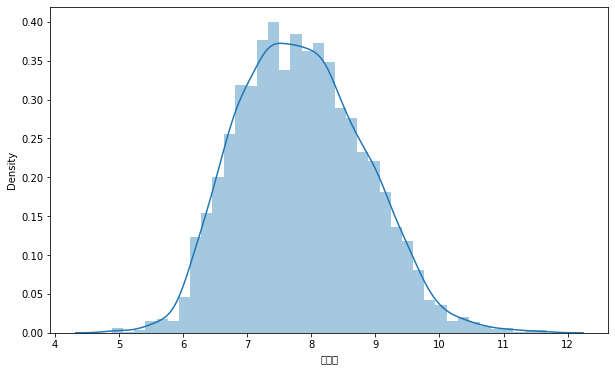

In [53]:
#임대료 열 로그 변환 후 히스토그램
Alog['임대료'] = np.log1p(Alog['임대료'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['임대료'])

print("Skewness: {:.3f}".format(Alog['임대료'].skew()))
print("Kurtosis: {:.3f}".format(Alog['임대료'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49900 missing from cur

Skewness: 0.099
Kurtosis: -0.052


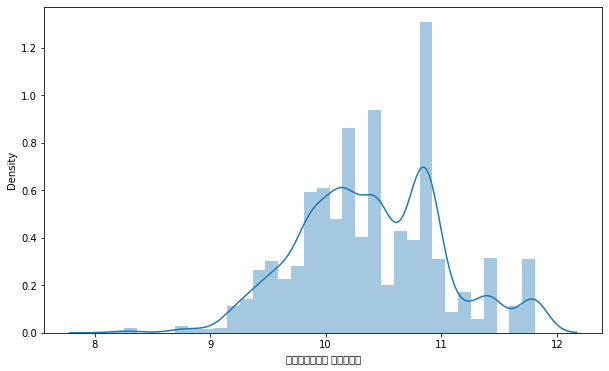

In [54]:
#점심저녁시간대 생활인구수 열 로그 변환 후 히스토그램
Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44061 missing from cur

Skewness: 0.641
Kurtosis: -0.230


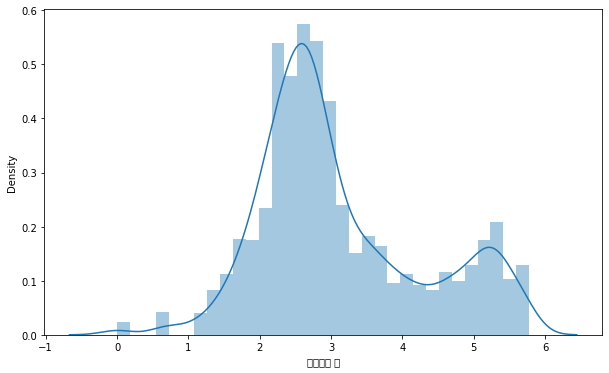

In [55]:
#집객시설 수 열 로그 변환 후 히스토그램
Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['집객시설 수'])

print("Skewness: {:.3f}".format(Alog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['집객시설 수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from cur

Skewness: -0.038
Kurtosis: 0.256


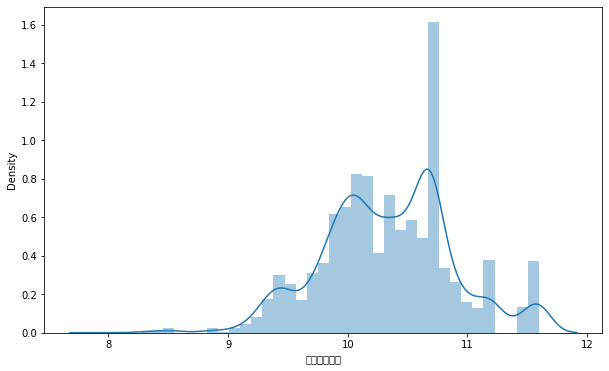

In [56]:
#총생활인구수 열 로그 변환 후 히스토그램
Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['총생활인구수'])

print("Skewness: {:.3f}".format(Alog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['총생활인구수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from cur

Skewness: -1.178
Kurtosis: 0.470


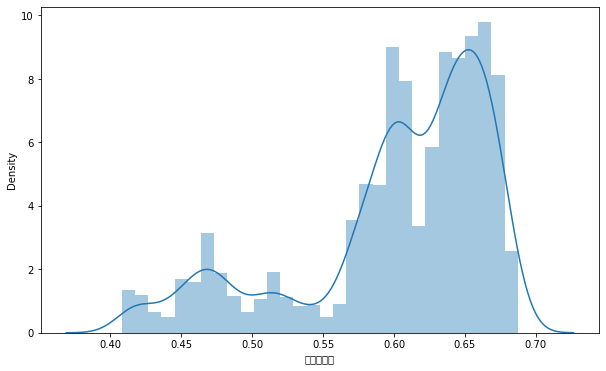

In [57]:
#타업종비율 열 로그 변환 후 히스토그램
Alog['타업종비율'] = np.log1p(Alog['타업종비율'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['타업종비율'])

print("Skewness: {:.3f}".format(Alog['타업종비율'].skew()))
print("Kurtosis: {:.3f}".format(Alog['타업종비율'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

In [58]:
#log변환 결과
Alog.head() 

,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,3.332205,5.123964,4.844187,9.329012,8.270525,9.299934,2.197225,9.364879,0.679915
1,3.433987,4.584967,3.526361,8.154788,6.840547,10.065697,2.079442,10.145813,0.676798
2,5.225747,4.770685,3.295837,7.655864,6.712956,9.830821,2.772589,9.949687,0.653926
3,3.970292,5.081404,3.931826,9.155779,7.326466,10.303716,1.945910,10.251679,0.653688
4,6.638568,3.555348,3.583519,7.383989,7.251345,9.580158,3.135494,9.493585,0.474937


In [59]:
#로버스트 스케일링
scaler = RobustScaler() 
df_robust = scaler.fit_transform(Arob)

In [60]:
#스케일링값 데이터프레임화
robust = pd.DataFrame(df_robust, columns =Arob.columns)

In [61]:
#결과값 확인
robust

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자
0,0.325,0.900360,-0.547929,-0.398107,-0.268299,-0.415372
1,-0.225,-0.049324,-0.527078,-0.454900,-0.401893,-0.499004
2,0.475,0.173589,0.294237,0.369154,0.456443,0.556352
3,-0.325,-1.150569,-0.613959,-0.595768,-0.600056,-0.718041
4,-0.350,-0.904165,0.207356,0.113586,0.028945,-0.269614
...,...,...,...,...,...,...
3835,0.050,0.408339,-0.121633,-0.006682,0.104648,0.120669
3836,0.000,0.387080,-0.388068,-0.280067,-0.185917,-0.259259
3837,-0.200,0.578286,-0.038228,0.105791,0.249374,0.275189
3838,-0.275,0.564972,-0.052129,0.089087,0.229335,0.250498


In [62]:
#연속형 변수끼리 합치기
robust[['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '임대료', '점심저녁시간대 생활인구수', '집객시설 수',
       '총생활인구수', '타업종비율']]=Alog 

In [63]:
robust

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,0.325,0.900360,-0.547929,-0.398107,-0.268299,-0.415372,3.332205,5.123964,4.844187,9.329012,8.270525,9.299934,2.197225,9.364879,0.679915
1,-0.225,-0.049324,-0.527078,-0.454900,-0.401893,-0.499004,3.433987,4.584967,3.526361,8.154788,6.840547,10.065697,2.079442,10.145813,0.676798
2,0.475,0.173589,0.294237,0.369154,0.456443,0.556352,5.225747,4.770685,3.295837,7.655864,6.712956,9.830821,2.772589,9.949687,0.653926
3,-0.325,-1.150569,-0.613959,-0.595768,-0.600056,-0.718041,3.970292,5.081404,3.931826,9.155779,7.326466,10.303716,1.945910,10.251679,0.653688
4,-0.350,-0.904165,0.207356,0.113586,0.028945,-0.269614,6.638568,3.555348,3.583519,7.383989,7.251345,9.580158,3.135494,9.493585,0.474937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,0.050,0.408339,-0.121633,-0.006682,0.104648,0.120669,4.060443,5.209486,3.178054,8.900958,6.539586,10.176072,2.197225,10.205908,0.676536
3836,0.000,0.387080,-0.388068,-0.280067,-0.185917,-0.259259,3.784190,5.849325,3.433987,9.665548,6.969791,10.090575,2.484907,10.215498,0.675642
3837,-0.200,0.578286,-0.038228,0.105791,0.249374,0.275189,4.189655,5.087596,2.833213,9.071193,6.204558,10.696566,2.639057,10.698458,0.676182
3838,-0.275,0.564972,-0.052129,0.089087,0.229335,0.250498,4.204693,5.010635,3.295837,9.024613,6.685861,10.696566,2.639057,10.698458,0.675645


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

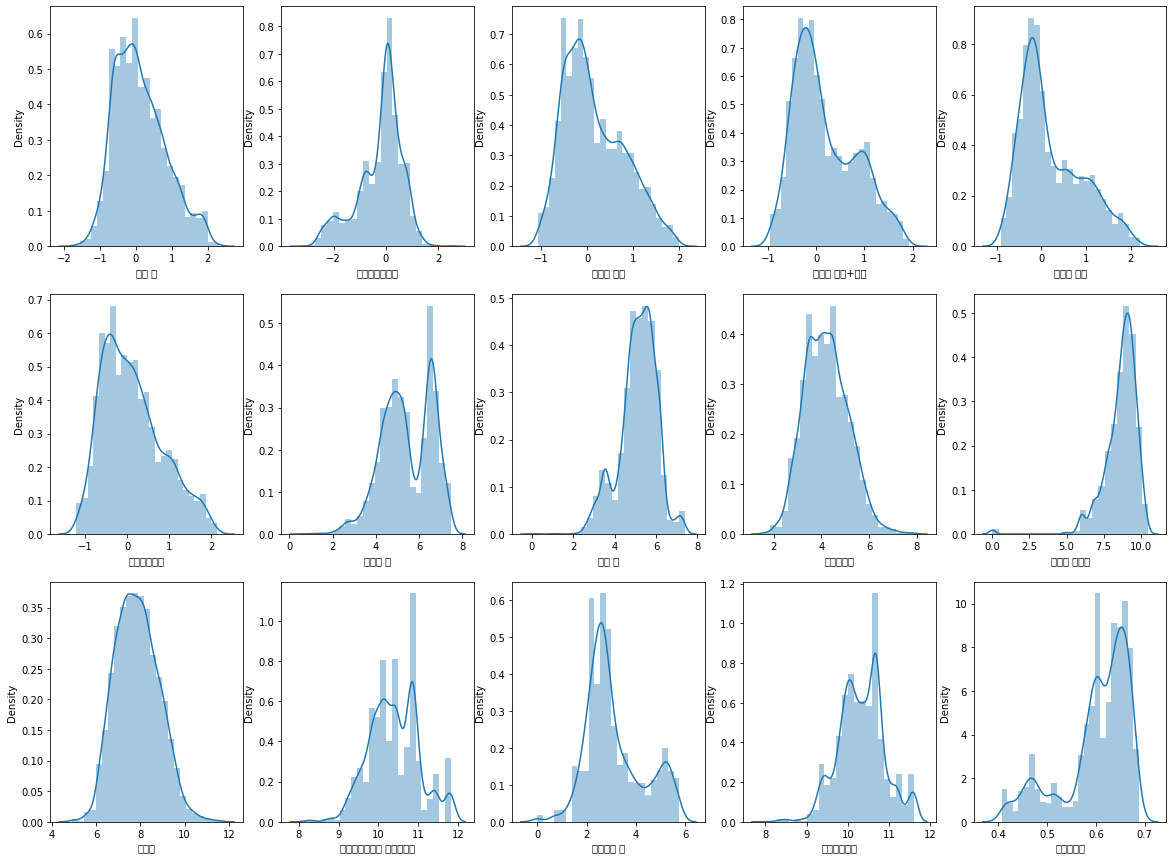

In [64]:
#연속형변수 전체 히스토그램그려보기   
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(robust.columns):
    sns.distplot(robust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)]) 
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

## 다중공선성 확인

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

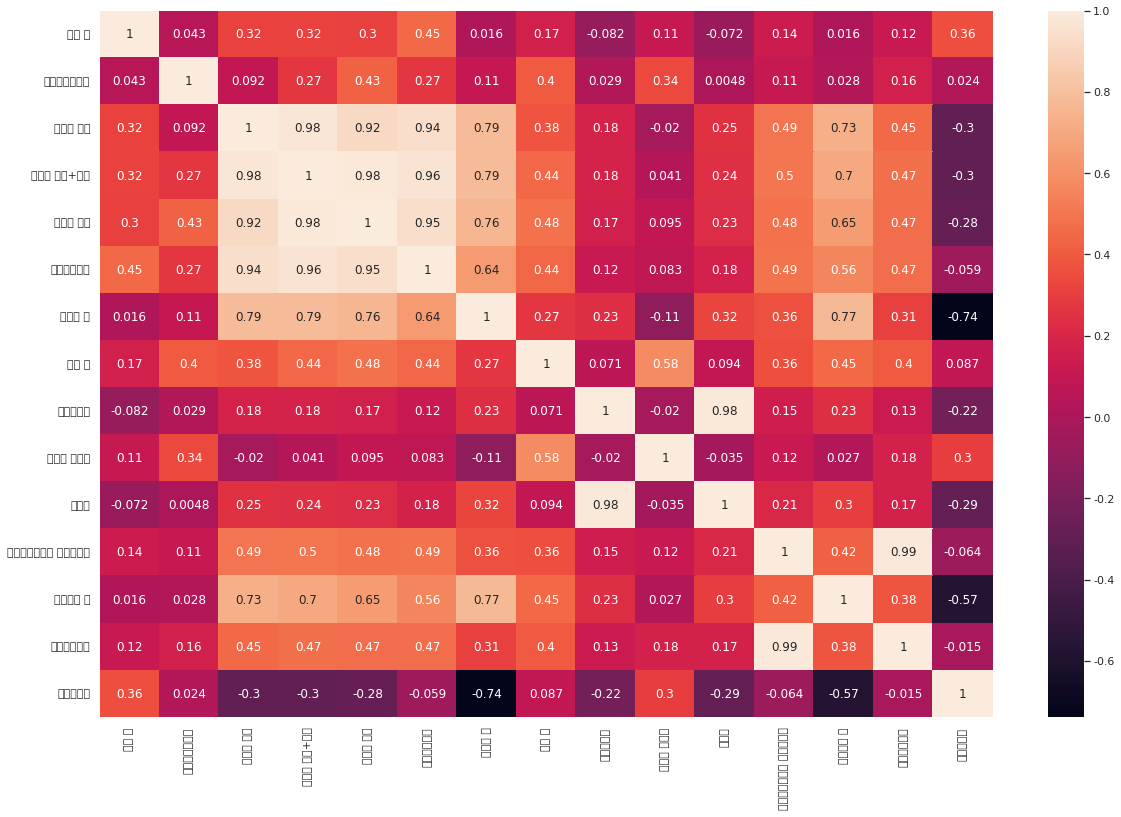

In [66]:
# #히트맵그리기-코랩용
# #annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
# #annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
# plt.rc("font", family = "NanumBarunGothic")
# sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="NanumBarunGothic", style='white')
# sns.heatmap(robust.corr(), annot = True) 
# plt.show()

In [ ]:
#히트맵그리기-주피터용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "NanumBarunGothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Maigun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#변수 별 vif 확인
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(robust.values, i) for i in range(robust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = robust.columns
vif

,VIF Factor,features
0,1.780279e+00,교통 수
1,3.936832e+00,버퍼내폐업비율
2,1.064053e+09,인허가 영업
3,4.626883e+09,인허가 영업+폐업
4,1.357722e+09,인허가 폐업
5,1.190225e+02,타업종경쟁자
6,1.253629e+01,경쟁자 수
7,3.219196e+00,교육 수
8,3.687323e+01,소재지면적
9,1.825610e+00,아파트 세대수


In [68]:
#위에 결과를 바탕으로 vif가 가장 높은 인허가 영업+폐업 칼럼 제거
vif = pd.DataFrame()
x_data2 = robust.drop('인허가 영업+폐업', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.796753,교통 수
1,4.182961,버퍼내폐업비율
2,51.611408,인허가 영업
3,57.554440,인허가 폐업
4,85.442016,타업종경쟁자
5,170.765071,경쟁자 수
6,91.368756,교육 수
7,680.460006,소재지면적
8,110.982068,아파트 세대수
9,2079.941419,임대료


In [69]:
#위에 결과를 바탕으로 vif가 가장 높은 총생활인구수 칼럼 제거
vif = pd.DataFrame()
x_data3 = x_data2.drop('총생활인구수', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.759423,교통 수
1,4.182957,버퍼내폐업비율
2,51.609375,인허가 영업
3,52.325304,인허가 폐업
4,79.008063,타업종경쟁자
5,161.410728,경쟁자 수
6,91.049825,교육 수
7,679.577216,소재지면적
8,110.112255,아파트 세대수
9,2074.474821,임대료


In [70]:
#위의 결과를 바탕으로 소재지면적 칼럼 제거
#vif가 가장 높은 칼럼은 임대료이지만 임대료와 가장 상관관계가 클 것으로 예상되는 소재지면적이 개별데이터가 아닌 행정데이터임을 고려하여 소재지면적 제거
vif = pd.DataFrame()
x_data4 = x_data3.drop('소재지면적', axis=1) #칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.755425,교통 수
1,4.161065,버퍼내폐업비율
2,51.556280,인허가 영업
3,52.313842,인허가 폐업
4,78.018201,타업종경쟁자
5,108.070202,경쟁자 수
6,91.046001,교육 수
7,110.111707,아파트 세대수
8,73.377591,임대료
9,371.203015,점심저녁시간대 생활인구수


In [71]:
#위에 결과를 바탕으로 vif가 가장 높은 타업종비율 칼럼 제거, 이 이상 제거는 로지스틱 분석 후 검토
vif = pd.DataFrame()
x_data5 = x_data4.drop('타업종비율', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,1.754888,교통 수
1,4.158845,버퍼내폐업비율
2,43.269438,인허가 영업
3,38.883196,인허가 폐업
4,47.405402,타업종경쟁자
5,106.881166,경쟁자 수
6,86.300532,교육 수
7,101.402613,아파트 세대수
8,71.137562,임대료
9,180.261492,점심저녁시간대 생활인구수


In [72]:
#vif 기준, 변수 삭제 후 데이터
x_data5 

,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수
0,0.325,0.900360,-0.547929,-0.268299,-0.415372,3.332205,5.123964,9.329012,8.270525,9.299934,2.197225
1,-0.225,-0.049324,-0.527078,-0.401893,-0.499004,3.433987,4.584967,8.154788,6.840547,10.065697,2.079442
2,0.475,0.173589,0.294237,0.456443,0.556352,5.225747,4.770685,7.655864,6.712956,9.830821,2.772589
3,-0.325,-1.150569,-0.613959,-0.600056,-0.718041,3.970292,5.081404,9.155779,7.326466,10.303716,1.945910
4,-0.350,-0.904165,0.207356,0.028945,-0.269614,6.638568,3.555348,7.383989,7.251345,9.580158,3.135494
...,...,...,...,...,...,...,...,...,...,...,...
3835,0.050,0.408339,-0.121633,0.104648,0.120669,4.060443,5.209486,8.900958,6.539586,10.176072,2.197225
3836,0.000,0.387080,-0.388068,-0.185917,-0.259259,3.784190,5.849325,9.665548,6.969791,10.090575,2.484907
3837,-0.200,0.578286,-0.038228,0.249374,0.275189,4.189655,5.087596,9.071193,6.204558,10.696566,2.639057
3838,-0.275,0.564972,-0.052129,0.229335,0.250498,4.204693,5.010635,9.024613,6.685861,10.696566,2.639057


In [73]:
#범주형 데이터
Adis

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3835,0,0,1,0,0,0
3836,0,0,1,0,0,0
3837,0,0,1,0,0,1
3838,0,0,1,0,0,0


In [74]:
#범주형변수 추가
x_data5[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=Adis 

In [75]:
#로지스틱 분석 할 데이터 확인
x_data5.head() 

,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,0.325,0.900360,-0.547929,-0.268299,-0.415372,3.332205,5.123964,9.329012,8.270525,9.299934,2.197225,1,0,0,0,0,0
1,-0.225,-0.049324,-0.527078,-0.401893,-0.499004,3.433987,4.584967,8.154788,6.840547,10.065697,2.079442,1,0,0,0,0,0
2,0.475,0.173589,0.294237,0.456443,0.556352,5.225747,4.770685,7.655864,6.712956,9.830821,2.772589,1,0,0,0,0,0
3,-0.325,-1.150569,-0.613959,-0.600056,-0.718041,3.970292,5.081404,9.155779,7.326466,10.303716,1.945910,1,0,0,0,0,0
4,-0.350,-0.904165,0.207356,0.028945,-0.269614,6.638568,3.555348,7.383989,7.251345,9.580158,3.135494,1,0,0,0,0,0


## 로지스틱 회귀분석 준비

In [157]:
#데이터준비
western = sm.add_constant(x_data5, has_constant="add") #데이터에 상수항 추가
western.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,0.325,0.900360,-0.547929,-0.268299,-0.415372,3.332205,5.123964,9.329012,8.270525,9.299934,2.197225,1,0,0,0,0,0
1,1.0,-0.225,-0.049324,-0.527078,-0.401893,-0.499004,3.433987,4.584967,8.154788,6.840547,10.065697,2.079442,1,0,0,0,0,0
2,1.0,0.475,0.173589,0.294237,0.456443,0.556352,5.225747,4.770685,7.655864,6.712956,9.830821,2.772589,1,0,0,0,0,0
3,1.0,-0.325,-1.150569,-0.613959,-0.600056,-0.718041,3.970292,5.081404,9.155779,7.326466,10.303716,1.945910,1,0,0,0,0,0
4,1.0,-0.350,-0.904165,0.207356,0.028945,-0.269614,6.638568,3.555348,7.383989,7.251345,9.580158,3.135494,1,0,0,0,0,0


In [158]:
#변수 구분
feature_columns = list(western.columns.difference(['생존여부']))
x1= western[feature_columns] #독립변수
y1= western['생존여부'] #5년 이상 생존 1 폐업 0 #종속변수

In [159]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2688, 17) (1152, 17) (2688,) (1152,)


In [160]:
#train 데이터 셋의 종속 변수 확인
y_train.value_counts() #불균형

0    2252
1     436
Name: 생존여부, dtype: int64

## 오버샘플링

In [161]:
from imblearn.over_sampling import SMOTE

In [162]:
#오버샘플링 함수
method=SMOTE()

In [163]:
#오버샘플링
X_resampled,y_resampled=method.fit_resample(x_train,y_train)

In [164]:
#독립변수 구조 확인
X_resampled.shape

(4504, 17)

In [165]:
#균형다시맞춤
y_resampled.value_counts() 

0    2252
1    2252
Name: 생존여부, dtype: int64

In [166]:
#결과 다시 x_train변수에 담기
x_train=X_resampled 

In [167]:
#결과 다시 y_train변수에 담기
y_train=y_resampled

In [168]:
x_train.shape

(4504, 17)

In [169]:
#균형다시맞춤
y_train.value_counts() 

0    2252
1    2252
Name: 생존여부, dtype: int64

## 로지스틱 회귀분석 시작

In [170]:
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.615764
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [171]:
#결과확인
results.summary() #점심저녁시간대 생활인구수, 아파트 세대수 제거 필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4504
Model:                          Logit   Df Residuals:                     4487
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1116
Time:                        04:31:16   Log-Likelihood:                -2773.4
converged:                      False   LL-Null:                       -3121.9
Covariance Type:            nonrobust   LLR p-value:                5.440e-138
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.0928   2.63e+05   9.91e-05      1.000   -5.16e+05    5.16e+05
경쟁자 수             0.2414      0.071      3.405      0.001       0.102       0.380
골목상권            -30.6461   2.63e+05     -0.000      1.000   -5.16e+05    5.16e+05
관광특구            -31.5084   2.63e+05     -0.000      1.000   -5.16e+05    5.16e+05
교육 수             -0.1597      0.061     -2.614      0.009      -0.280      -0.040
교통 수              0.3396      0.061      5.557      0.000       0.220       0.459
구분불가            -30.8897   2.63e+05     -0.000      1.000   -5.16e+05    5.16e+05
발달상권            -30.7911   2.63e+05     -0.000      1.000   -5.16e+05    5.16e+05
버퍼내폐업비율           0.2019      0.080      2.516      0.012       0.045       0.359
아파트 세대수           0.0264      0.041      0.644      0.520      -0.054       0.107
인허가 영업           -0.3736      0.330     -1.133      0.257      -1.020       0.273
인허가 폐업           -0.1469      0.295     -0.499      0.618      -0.725       0.431
임대료               0.4450      0.038     11.614      0.000       0.370       0.520
전통시장            -31.7089   2.63e+05     -0.000      1.000   -5.16e+05    5.16e+05
점심저녁시간대 생활인구수     0.0165      0.066      0.250      0.803      -0.113       0.146
집객시설 수            0.0684      0.065      1.045      0.296      -0.060       0.197
타업종경쟁자           -0.0562      0.328     -0.171      0.864      -0.700       0.587
=================================================================================
"""

In [172]:
#회귀계수 확인
results.params

const            26.092824
경쟁자 수             0.241366
골목상권            -30.646144
관광특구            -31.508357
교육 수             -0.159726
교통 수              0.339566
구분불가            -30.889728
발달상권            -30.791148
버퍼내폐업비율           0.201904
아파트 세대수           0.026393
인허가 영업           -0.373641
인허가 폐업           -0.146932
임대료               0.444987
전통시장            -31.708929
점심저녁시간대 생활인구수     0.016502
집객시설 수            0.068444
타업종경쟁자           -0.056167
dtype: float64

In [173]:
#변환 후 회귀계수 확인
np.exp(results.params)

const            2.147679e+11
경쟁자 수            1.272986e+00
골목상권             4.903980e-14
관광특구             2.070592e-14
교육 수             8.523774e-01
교통 수             1.404338e+00
구분불가             3.843805e-14
발달상권             4.242036e-14
버퍼내폐업비율          1.223731e+00
아파트 세대수          1.026744e+00
인허가 영업           6.882237e-01
인허가 폐업           8.633528e-01
임대료              1.560470e+00
전통시장             1.694287e-14
점심저녁시간대 생활인구수    1.016639e+00
집객시설 수           1.070841e+00
타업종경쟁자           9.453809e-01
dtype: float64

In [174]:
#예측
y_pred = results.predict(x_test)
y_pred

950     0.535140
219     0.496850
2221    0.409267
1441    0.263232
1229    0.747691
          ...   
2895    0.337427
257     0.555330
365     0.514905
2542    0.396781
2164    0.513999
Length: 1152, dtype: float64

In [175]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7 예측
Y_pred = PRED(y_pred,0.7)
Y_pred

950     0
219     0
2221    0
1441    0
1229    1
       ..
2895    0
257     0
365     0
2542    0
2164    0
Length: 1152, dtype: int64

In [176]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[940  19]
 [188   5]]


In [177]:
#accuracy
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [184]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='weighted') 

In [185]:
#accuracy, f1-score 확인
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}")

f1:0.757617 accuracy:0.8203


## 로지스틱 변수 재설계 후 예측 (1차)

In [186]:
#점심저녁시간대 생활인구수, 아파트 세대수 변수 제거
x_trainf = x_train.columns.difference(x_train[['점심저녁시간대 생활인구수', '아파트 세대수']].columns)
#훈련데이터에서 변수 선택
x_train2 = x_train[x_trainf] 

In [187]:
x_train2.head()

,const,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,전통시장,집객시설 수,타업종경쟁자
0,1.0,6.470800,0,0,5.733341,0.050,0,1,0.295278,0.867651,1.101030,6.647688,0,5.017280,1.045400
1,1.0,5.252273,0,0,3.970292,-0.650,1,0,-1.099878,-0.200405,-0.307264,7.244228,0,1.791759,-0.334130
2,1.0,5.257495,1,0,4.753590,-0.325,0,0,0.267448,-0.405445,-0.228222,6.637258,0,1.098612,-0.419355
3,1.0,4.356709,0,0,5.598422,0.225,1,0,0.615176,-0.743701,-0.542165,7.571988,0,2.197225,-0.785743
4,1.0,5.442418,0,0,4.110874,-0.275,1,0,-1.418984,0.294237,-0.047871,9.138092,0,2.639057,0.159697


In [188]:
#테스트데이터에서 똑같이 반영
x_testf = x_test.columns.difference(x_test[['점심저녁시간대 생활인구수', '아파트 세대수']].columns)
x_test2 = x_test[x_testf]

In [189]:
x_test2.head()

,const,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,전통시장,집객시설 수,타업종경쟁자
950,1.0,4.867534,1,0,5.673323,0.975,0,0,-0.857454,-0.290762,-0.330643,7.884953,0,2.397895,-0.364397
219,1.0,5.003946,1,0,4.976734,0.700,0,0,-0.500724,0.368375,0.278319,8.076826,0,2.833213,0.509359
2221,1.0,4.875197,0,0,6.154858,-0.225,0,0,0.879205,-0.566464,-0.295018,9.066816,1,2.772589,-0.529271
1441,1.0,5.308268,0,0,3.663562,0.550,0,1,-2.156720,0.539820,-0.097968,6.359574,0,3.367296,0.315810
1229,1.0,6.345636,0,0,5.945421,-0.050,0,1,0.069821,0.280336,0.403006,10.610488,0,3.806662,0.202708


In [190]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.615818
         Iterations 34


In [191]:
#결과확인
results.summary() #골목상권, 관광특구, 구분불가, 발달상권, 전통시장, 집객시설 수 제거 필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4504
Model:                          Logit   Df Residuals:                     4489
Method:                           MLE   Df Model:                           14
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1116
Time:                        04:32:57   Log-Likelihood:                -2773.6
converged:                       True   LL-Null:                       -3121.9
Covariance Type:            nonrobust   LLR p-value:                1.382e-139
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.2908   5.31e+06   9.09e-06      1.000   -1.04e+07    1.04e+07
경쟁자 수          0.2370      0.071      3.361      0.001       0.099       0.375
골목상권         -52.5544   5.31e+06  -9.89e-06      1.000   -1.04e+07    1.04e+07
관광특구         -53.4199   5.31e+06  -1.01e-05      1.000   -1.04e+07    1.04e+07
교육 수          -0.1367      0.051     -2.685      0.007      -0.236      -0.037
교통 수           0.3399      0.061      5.568      0.000       0.220       0.460
구분불가         -52.7887   5.31e+06  -9.94e-06      1.000   -1.04e+07    1.04e+07
발달상권         -52.6944   5.31e+06  -9.92e-06      1.000   -1.04e+07    1.04e+07
버퍼내폐업비율        0.2058      0.080      2.574      0.010       0.049       0.362
인허가 영업        -0.3853      0.329     -1.171      0.242      -1.030       0.260
인허가 폐업        -0.1538      0.294     -0.523      0.601      -0.731       0.423
임대료            0.4461      0.038     11.703      0.000       0.371       0.521
전통시장         -53.6178   5.31e+06  -1.01e-05      1.000   -1.04e+07    1.04e+07
집객시설 수         0.0696      0.065      1.064      0.287      -0.059       0.198
타업종경쟁자        -0.0384      0.327     -0.117      0.907      -0.679       0.602
==============================================================================
"""

In [192]:
#회귀계수 확인
results.params

const      48.290843
경쟁자 수       0.236987
골목상권      -52.554399
관광특구      -53.419876
교육 수       -0.136660
교통 수        0.339896
구분불가      -52.788712
발달상권      -52.694380
버퍼내폐업비율     0.205772
인허가 영업     -0.385319
인허가 폐업     -0.153830
임대료         0.446118
전통시장      -53.617766
집객시설 수      0.069596
타업종경쟁자     -0.038385
dtype: float64

In [193]:
#변환 후 회귀계수 확인
np.exp(results.params)

const      9.385269e+20
경쟁자 수      1.267425e+00
골목상권       1.499390e-23
관광특구       6.310196e-24
교육 수       8.722669e-01
교통 수       1.404802e+00
구분불가       1.186189e-23
발달상권       1.303531e-23
버퍼내폐업비율    1.228473e+00
인허가 영업     6.802337e-01
인허가 폐업     8.574178e-01
임대료        1.562236e+00
전통시장       5.177260e-24
집객시설 수     1.072075e+00
타업종경쟁자     9.623426e-01
dtype: float64

In [194]:
#예측
y_pred = results.predict(x_test2)
y_pred

950     0.532708
219     0.493295
2221    0.404573
1441    0.261798
1229    0.751351
          ...   
2895    0.336771
257     0.554775
365     0.516531
2542    0.380061
2164    0.513054
Length: 1152, dtype: float64

In [195]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7 예측
Y_pred = PRED(y_pred,0.7)
Y_pred

950     0
219     0
2221    0
1441    0
1229    1
       ..
2895    0
257     0
365     0
2542    0
2164    0
Length: 1152, dtype: int64

In [196]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[941  18]
 [188   5]]


In [197]:
#accuracy
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [198]:
#accuracy 확인
acc(cfmat)

0.8211805555555556

In [199]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='weighted') 
print(f"f1:{f1:4f}")

f1:0.758091


## 로지스틱 변수 재설계 후 예측 (2차)

In [200]:
#골목상권, 관광특구, 구분불가, 발달상권, 전통시장 변수 추가로 제거
x_trainf = x_train.columns.difference(x_train[['점심저녁시간대 생활인구수', '아파트 세대수', '골목상권', '관광특구', '구분불가', '발달상권', '전통시장']].columns)
#훈련데이터에서 변수 선택
x_train3 = x_train[x_trainf] 

In [201]:
x_train3.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,집객시설 수,타업종경쟁자
0,1.0,6.470800,5.733341,0.050,0.295278,0.867651,1.101030,6.647688,5.017280,1.045400
1,1.0,5.252273,3.970292,-0.650,-1.099878,-0.200405,-0.307264,7.244228,1.791759,-0.334130
2,1.0,5.257495,4.753590,-0.325,0.267448,-0.405445,-0.228222,6.637258,1.098612,-0.419355
3,1.0,4.356709,5.598422,0.225,0.615176,-0.743701,-0.542165,7.571988,2.197225,-0.785743
4,1.0,5.442418,4.110874,-0.275,-1.418984,0.294237,-0.047871,9.138092,2.639057,0.159697


In [202]:
#테스트데이터에서 똑같이 반영
x_testf = x_test.columns.difference(x_test[['점심저녁시간대 생활인구수', '아파트 세대수', '골목상권', '관광특구', '구분불가', '발달상권', '전통시장']].columns)
x_test3 = x_test[x_testf]

In [203]:
x_test3.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,집객시설 수,타업종경쟁자
950,1.0,4.867534,5.673323,0.975,-0.857454,-0.290762,-0.330643,7.884953,2.397895,-0.364397
219,1.0,5.003946,4.976734,0.700,-0.500724,0.368375,0.278319,8.076826,2.833213,0.509359
2221,1.0,4.875197,6.154858,-0.225,0.879205,-0.566464,-0.295018,9.066816,2.772589,-0.529271
1441,1.0,5.308268,3.663562,0.550,-2.156720,0.539820,-0.097968,6.359574,3.367296,0.315810
1229,1.0,6.345636,5.945421,-0.050,0.069821,0.280336,0.403006,10.610488,3.806662,0.202708


In [204]:
#모델생성
model = sm.Logit(y_train,x_train3)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.662991
         Iterations 5


In [205]:
#결과확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4504
Model:                          Logit   Df Residuals:                     4494
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.04351
Time:                        04:33:23   Log-Likelihood:                -2986.1
converged:                       True   LL-Null:                       -3121.9
Covariance Type:            nonrobust   LLR p-value:                 2.650e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6570      0.487     -9.566      0.000      -5.611      -3.703
경쟁자 수          0.2897      0.068      4.230      0.000       0.155       0.424
교육 수          -0.1710      0.049     -3.521      0.000      -0.266      -0.076
교통 수           0.2891      0.059      4.921      0.000       0.174       0.404
버퍼내폐업비율        0.1022      0.074      1.383      0.167      -0.043       0.247
인허가 영업        -0.9020      0.312     -2.893      0.004      -1.513      -0.291
인허가 폐업        -0.1183      0.279     -0.424      0.672      -0.665       0.429
임대료            0.4634      0.037     12.675      0.000       0.392       0.535
집객시설 수         0.1127      0.060      1.878      0.060      -0.005       0.230
타업종경쟁자         0.3531      0.316      1.117      0.264      -0.266       0.973
==============================================================================
"""

In [206]:
#회귀계수 확인
results.params

const     -4.656950
경쟁자 수      0.289671
교육 수      -0.171041
교통 수       0.289095
버퍼내폐업비율    0.102219
인허가 영업    -0.901960
인허가 폐업    -0.118320
임대료        0.463423
집객시설 수     0.112653
타업종경쟁자     0.353052
dtype: float64

In [207]:
#변환 후 회귀계수 확인
np.exp(results.params)

const      0.009495
경쟁자 수      1.335989
교육 수       0.842787
교통 수       1.335219
버퍼내폐업비율    1.107626
인허가 영업     0.405774
인허가 폐업     0.888412
임대료        1.589506
집객시설 수     1.119244
타업종경쟁자     1.423405
dtype: float64

In [208]:
# 회귀계수 확인
np.exp(results.params)

const      0.009495
경쟁자 수      1.335989
교육 수       0.842787
교통 수       1.335219
버퍼내폐업비율    1.107626
인허가 영업     0.405774
인허가 폐업     0.888412
임대료        1.589506
집객시설 수     1.119244
타업종경쟁자     1.423405
dtype: float64

In [209]:
#예측
y_pred = results.predict(x_test3)
y_pred

950     0.518444
219     0.492327
2221    0.645756
1441    0.300553
1229    0.781423
          ...   
2895    0.360976
257     0.561513
365     0.520222
2542    0.469510
2164    0.535121
Length: 1152, dtype: float64

In [210]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7 예측
Y_pred = PRED(y_pred,0.7)
Y_pred

950     0
219     0
2221    0
1441    0
1229    1
       ..
2895    0
257     0
365     0
2542    0
2164    0
Length: 1152, dtype: int64

In [211]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[929  30]
 [178  15]]


In [212]:
#accuracy
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [213]:
#accuracy 확인
acc(cfmat)

0.8194444444444444

In [214]:
 #f1-score
f1 = f1_score(y_test, Y_pred, average='weighted')
print(f"f1:{f1:4f}")

f1:0.769772


## KNN

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train3,y_train)
    y_pred=clf.predict(x_test3)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.6675347222222222
k: 2, 정확도: 0.7065972222222222
k: 3, 정확도: 0.6328125
k: 4, 정확도: 0.6553819444444444
k: 5, 정확도: 0.609375
k: 6, 정확도: 0.6423611111111112
k: 7, 정확도: 0.5885416666666666
k: 8, 정확도: 0.6180555555555556
k: 9, 정확도: 0.5807291666666666


In [217]:
#knn 학습, k=2 지정
clf=KNeighborsClassifier(2)
clf.fit(x_train3,y_train)

KNeighborsClassifier(n_neighbors=2)

In [218]:
#예측
y_pred=clf.predict(x_test3)

In [219]:
#성능확인
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[761 198]
 [140  53]]


In [221]:
#accuracy, f1-score 확인
acc=accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"f1:{f1:4f} acc:{acc:.4f}")

f1:0.721186 acc:0.7066


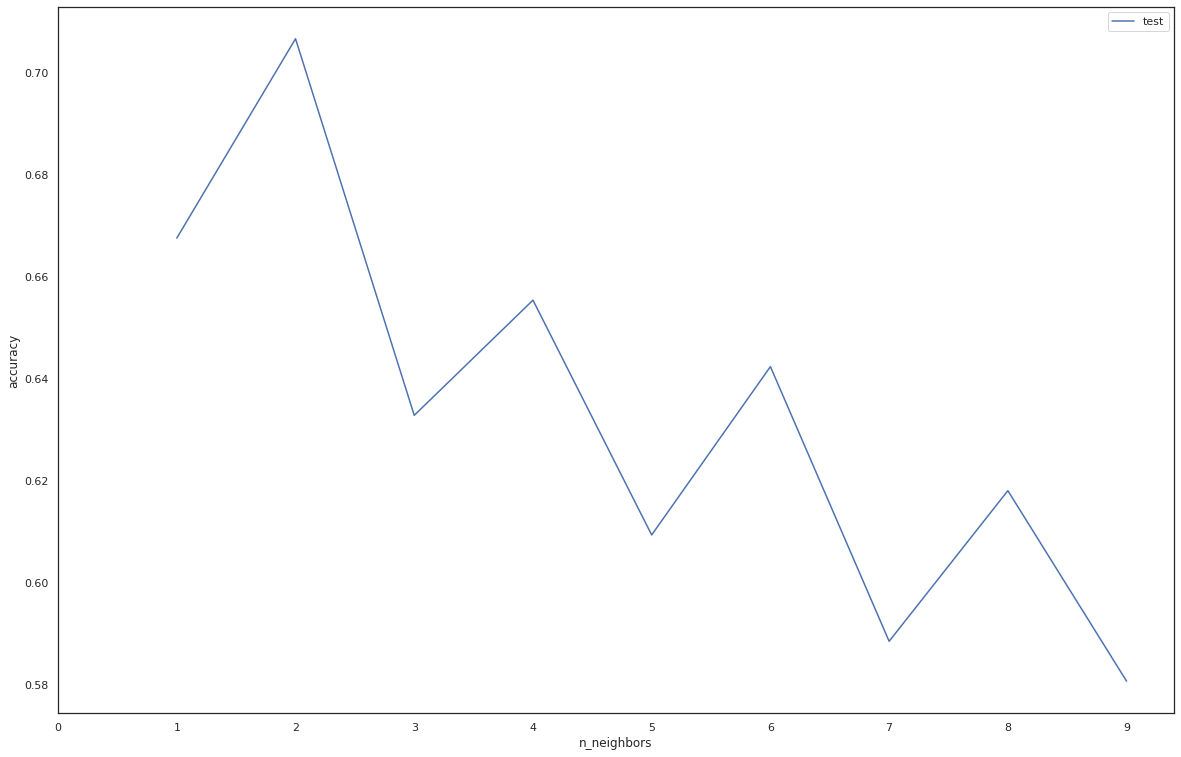

In [222]:
import numpy as np
import matplotlib.pyplot as plt

#k별로 정확도 비교
plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

## 랜덤포레스트

In [223]:
from sklearn.ensemble import RandomForestClassifier
#파라미터 지정
rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
#랜덤포레스트 학습
rf_clf.fit(x_train3, y_train)
pred = rf_clf.predict(x_test3)

#정확도, f1-score 확인
accuracy = accuracy_score(y_test, pred) 
f1 = f1_score(y_test,pred,average='weighted') 

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s


f1:0.724868 accuracy:0.7031


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [224]:
#성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[740 219]
 [123  70]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#gridsearchcv를 활용한 교차검증 및 최적의 파라미터 찾기
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8, 12, 18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv = 3)
grid_cv.fit(x_train3, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                        param_grid = params,
                        n_jobs = -1,
                        verbose = 1,
                        cv = 3,
                        scoring = 'f1')
grid_cv2.fit(x_train3, y_train)

#f1스코어 모델 기준 예측값
pred = grid_cv2.predict(x_test3)

print('최적 하이퍼 마라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.7635
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 f1-score: 0.7771


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


In [ ]:
#gridcv(f1스코어기준) 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[661 298]
 [103  90]]


# boosting - xgboost

In [225]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

#검증 데이터 넣어주어서 교차 검증 해보기
evals = [(x_test3, y_test)]
#파라미터 지정
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)

#eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train3, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

#예측
pred = xgb_wrapper.predict(x_test3)
preds_proba = xgb_wrapper.predict_proba(x_test3)[:, 1]
print(preds_proba[:10])

#정확도, f1-score 확인
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[0]	validation_0-logloss:0.686146
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.679763
[2]	validation_0-logloss:0.675937
[3]	validation_0-logloss:0.672052
[4]	validation_0-logloss:0.66967
[5]	validation_0-logloss:0.667519
[6]	validation_0-logloss:0.666337
[7]	validation_0-logloss:0.664403
[8]	validation_0-logloss:0.662769
[9]	validation_0-logloss:0.660878
[10]	validation_0-logloss:0.659719
[11]	validation_0-logloss:0.657809
[12]	validation_0-logloss:0.65707
[13]	validation_0-logloss:0.656191
[14]	validation_0-logloss:0.655456
[15]	validation_0-logloss:0.654233
[16]	validation_0-logloss:0.652285
[17]	validation_0-logloss:0.651148
[18]	validation_0-logloss:0.649892
[19]	validation_0-logloss:0.64961
[20]	validation_0-logloss:0.648358
[21]	validation_0-logloss:0.645966
[22]	validation_0-logloss:0.645306
[23]	validation_0-logloss:0.644419
[24]	validation_0-logloss:0.64426
[25]	validation_0-logloss:0.642222
[26]	validation_0-logloss:0.641786


In [226]:
#성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[758 201]
 [129  64]]


In [227]:
#예측값 
xgb_wrapper.predict(x_test3)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train3, y_train)

grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train3, y_train)

pred = grid_cv2.predict(x_test3)  #f1스코어기준 모델의 예측값

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 정확도 : 0.8368239785696945
최적의 파라미터: {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 f1socre : 0.8372212138762282


In [ ]:
#gridcv(f1스코어기준) 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[775 184]
 [145  48]]


In [ ]:
#한글 폰트 지정 - 주피터용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Maigun Gothic'

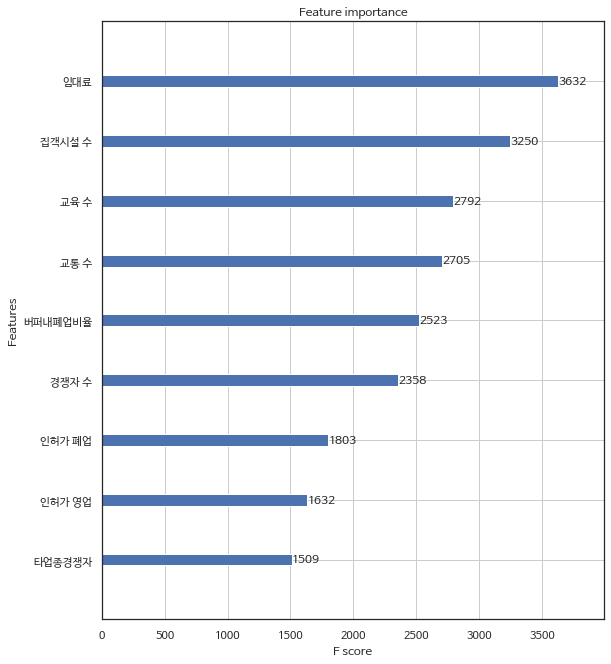

In [ ]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)

<변수 선택>

다중공선성 제외 : 인허가 영업+폐업, 총생활인구수, 소재지면적, 타업종비율

로지스틱 제외 : 점심저녁시간대 생활인구수, 아파트 세대수, 골목상권, 관광특구, 구분불가, 발달상권, 집객시설 수

최종 변수 : 경쟁자 수, 교육 수, 교통 수, 버퍼내폐업비율, 인허가 영업, 인허가 폐업, 임대료, 집객시설 수, 타업종경쟁자

<모형>

로지스틱(2차) : 
f1 : 0.769772, acc : 0.8194444444444444

KNN : f1 : 0.721186,  acc : 0.7066

randomforest : 
f1 : 0.724868, acc : 0.7031

randomforest(grid) : 
f1 : 0.7618, acc : 0.7493


xgboost : 
f1 : 0.730472, acc : 0.7135

xgboost(grid) : 
f1 : 0.8347828675328376, acc : 0.8337142008893021

<변수중요도>

임대료 > 집객시설 수 > 버퍼내폐업비율 > 교통 수 > 교육 수 >  경쟁자 수 > 인허가 영업 > 타업종경쟁자 > 인허가 폐업



<주요 변수와 생존의 관계>

임대료↑ 생존확률 1.6235배↑
집객시설 수↑ 생존확률 1.0967배↑
버퍼내폐업비율↑ 생존확률 1.2164배↑


<최종모형>
xgboost

## 예측

In [ ]:
#예측할 데이터 불러오기-주피터용
forecast = pd.read_csv('영업경양식예측.csv', encoding='cp949') #csv 불러오기

In [149]:
#예측할 데이터 불러오기-코랩용
#forecast = pd.read_csv('/content/drive/MyDrive/bigdata/영업경양식예측.csv', encoding='cp949') #csv 불러오기

,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,집객시설 수,타업종경쟁자
0,31,150,87,0.561216,534,683,970,11,1186
1,734,395,92,0.489995,1886,1812,3169,82,2964
2,714,352,81,0.488405,1809,1727,15429,58,2822
3,722,354,82,0.489563,1834,1759,6378,61,2871
4,183,118,95,0.511765,1162,1218,1555,15,2197


In [ ]:
forecast.head()

In [150]:
#데이터에 상수항 추가
kf = sm.add_constant(forecast, has_constant="add")
kf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,인허가 영업,인허가 폐업,임대료,집객시설 수,타업종경쟁자
0,1.0,31,150,87,0.561216,534,683,970,11,1186
1,1.0,734,395,92,0.489995,1886,1812,3169,82,2964
2,1.0,714,352,81,0.488405,1809,1727,15429,58,2822
3,1.0,722,354,82,0.489563,1834,1759,6378,61,2871
4,1.0,183,118,95,0.511765,1162,1218,1555,15,2197
...,...,...,...,...,...,...,...,...,...,...
3788,1.0,91,166,49,0.527344,726,810,729,13,1445
3789,1.0,89,175,63,0.531741,804,913,893,5,1628
3790,1.0,53,159,70,0.522112,724,791,1384,8,1462
3791,1.0,83,125,62,0.535861,906,1046,2343,13,1869


In [12]:
#from xgboost import XGBClassifier

In [151]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.8, 
                            gamma = 0.5, learning_rate = 0.1, max_depth = 10, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train3, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])

kfpred

[0.01818834 0.01818834 0.01818834 0.01818834 0.01818834 0.01818834
 0.01818834 0.01818834 0.01818834 0.01818834]


array([0, 0, 0, ..., 0, 0, 0])

In [152]:
live = pd.DataFrame(kfpred)

live.to_csv('/content/drive/MyDrive/bigdata/경양식_생존여부.csv',index=False,encoding='cp949') 

In [153]:
result = pd.read_csv('/content/drive/MyDrive/bigdata/경양식_생존여부.csv')
print(result)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
3788  0
3789  0
3790  0
3791  0
3792  0

[3793 rows x 1 columns]


In [154]:
live2 = pd.DataFrame(kfpred_proba)

In [155]:
live2.to_csv('/content/drive/MyDrive/bigdata/경양식_생존확률.csv',index=False,encoding='cp949') 

In [156]:
result1 = pd.read_csv('/content/drive/MyDrive/bigdata/경양식_생존확률.csv')
print(result1)

             0
0     0.018188
1     0.018188
2     0.018188
3     0.018188
4     0.018188
...        ...
3788  0.018188
3789  0.027257
3790  0.018188
3791  0.018188
3792  0.018188

[3793 rows x 1 columns]
